# Rock Physics inversion for water/CO2 saturation from Volcanic attenuation tomography data

In [2]:
from importlib import reload
import volcaniQ as vq
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
reload(vq)
volcanic_data = vq.CleanReadCSV()
fluid_data=pd.read_csv('fluid_data.csv')

Text(0.5, 0, 'Viscosity(Pa.ms)')

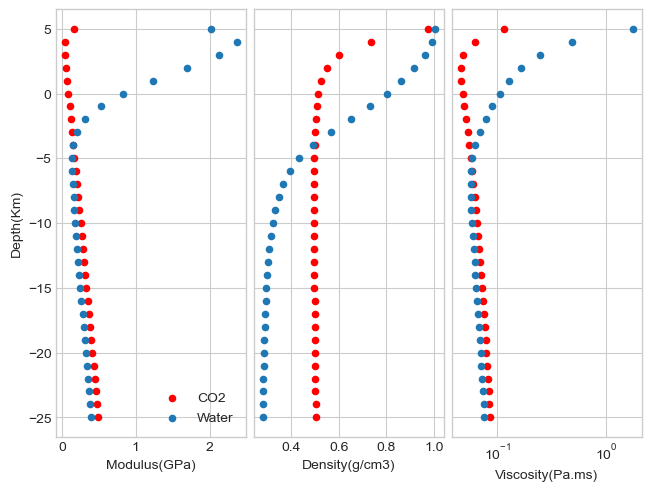

In [4]:
data = {}
data['depth'] = fluid_data[['Depth(Km)']].T.values
data['modulus'] = fluid_data[['CO2-mod(GPa)', 'water-mod(GPa)']].T.values
data['density'] = fluid_data[['CO2-Dens(g/cm3)', 'water-Dens(g/cm3)']].T.values
data['viscosity'] = fluid_data[['CO2-Viscosity(Pa.ms)', 'water-Viscosity(Pa.ms)']].T.values
data['co2_color'], data['water_color'] = 'r', 'b'

plt.style.use('seaborn-whitegrid')
fig, axs = plt.subplots(1, 3,constrained_layout = True)

axs[0].scatter(data['modulus'][0], -data['depth'], c=data['co2_color'], s=20, label='CO2')
axs[0].scatter( data['modulus'][1],-data['depth'], s=20, label='Water')
axs[0].set_ylabel('Depth(Km)')
axs[0].set_xlabel('Modulus(GPa)')
axs[0].legend()
axs[1].scatter( data['density'][0], -data['depth'],c=data['co2_color'],s=20, label='CO2')
axs[1].scatter( data['density'][1],-data['depth'], s=20, label='Water')
axs[1].set_xlabel('Density(g/cm3)')
axs[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
axs[2].scatter( data['viscosity'][0], -data['depth'], c=data['co2_color'], s=20, label='CO2')
axs[2].scatter( data['viscosity'][1], -data['depth'], s=20, label='Water')
axs[2].set_xscale('log')
axs[2].tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
axs[2].set_xlabel('Viscosity(Pa.ms)')


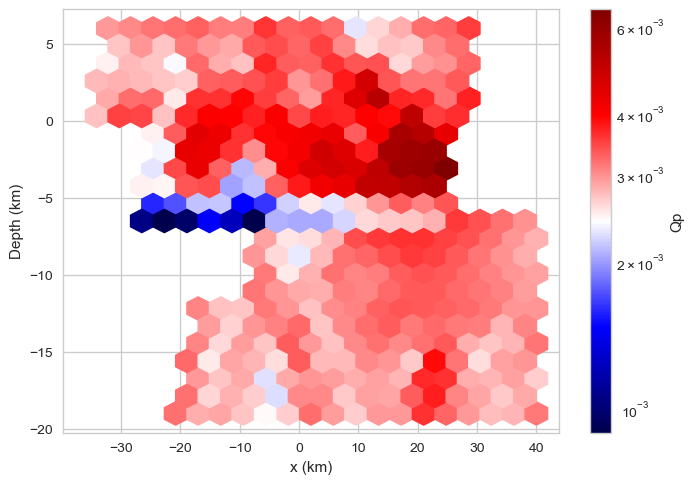

<Figure size 4212x4212 with 0 Axes>

In [262]:
volcanic_data.hexplot(plot="Qp", direction="y", value=-21, func=(lambda x: 1/x), bins='log', grid=20)

In [12]:
import plotly.express as px
fig = px.scatter(volcanic_data.data[volcanic_data.data['z'] ==-5], x='x', y='y',
              color='Qp')
fig.update_yaxes(
      scaleanchor="x",
      scaleratio=1,
)

fig.show()

<AxesSubplot:xlabel='z'>

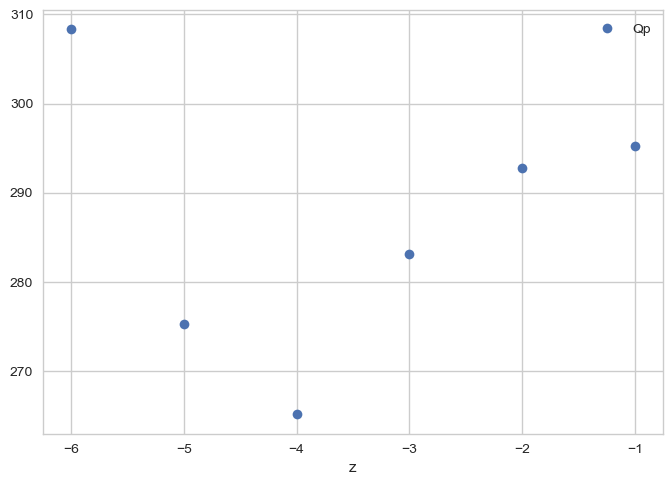

In [218]:
volcanic_data.data\
    [volcanic_data.data["z"].between(-5,0)]\
    [volcanic_data.data["x"].between(6,9)]\
    [volcanic_data.data["z"].between(-19,21)]\
    .groupby('z')\
    .mean()\
    .plot(y='Qp', style='o')

In [242]:
volcanic_data.data['K/mu'] = volcanic_data.data['K']/volcanic_data.data['μ']

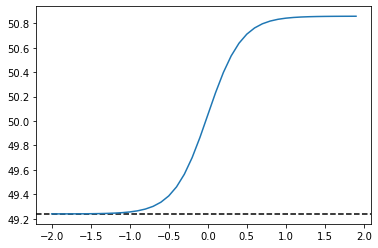

In [68]:
model1 = vq.RockPhysicsModel(dry_modulus=20.,shear_modulus=20, mineral_modulus=38, porosity=0.2, density=2.65)
model1.plot(fluid_modulus=2.5, epsilon=.03, tau=1)

In [66]:
highQpdata = data.data[data.data.Qp.notnull()][data.data.Qp>800]
highQsdata = data.data[data.data.Qp.notnull()][data.data.Qs>1000]
mod = highQpdata.K
she = highQsdata.μ
mod.mean(), she.mean()

<ipython-input-66-49cd03391929>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  highQpdata = data.data[data.data.Qp.notnull()][data.data.Qp>800]
<ipython-input-66-49cd03391929>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  highQsdata = data.data[data.data.Qp.notnull()][data.data.Qs>1000]


(43.68873573573574, 26.02604200853298)